# 1) DICOM Image Format is an international standard to transmit, store, retrieve, print, process, and display medical imaging information. DICOM allows transmitting medical imaging data to devices like scanners, servers, workstations, printers, network hardware, and PACS.

In [4]:
#install pydicom library
#!pip installpydicom

In [14]:
import pydicom as dicom
from matplotlib import pyplot as plt
from glob import glob

In [15]:
file=r"C:\Users\AlexandruDaia\Downloads\test\test\test\99\1.2.826.0.1.3680043.8.498.23306512864706862436738227451103099711\1.2.826.0.1.3680043.8.498.12693337998279862314931080463756529236\1.2.826.0.1.3680043.8.498.22189687591935377743539150797438637090-c.dcm"

In [16]:
print(file)

C:\Users\AlexandruDaia\Downloads\test\test\test\99\1.2.826.0.1.3680043.8.498.23306512864706862436738227451103099711\1.2.826.0.1.3680043.8.498.12693337998279862314931080463756529236\1.2.826.0.1.3680043.8.498.22189687591935377743539150797438637090-c.dcm


In [17]:
# Reading the DCM File
d_file = dicom.dcmread(file)

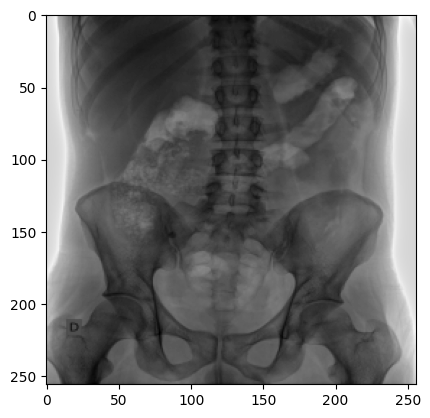

In [18]:
#Plotting The Image
plt.imshow(d_file.pixel_array, cmap='gray')

In [19]:
#DICOM Metadata

In [20]:
print(d_file)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 242
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.498.22189687591935377743539150797438637090
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1143.107.104.103.115.3.0.10
(0002,0013) Implementation Version Name         SH: 'GDCM 3.0.10'
(0002,0016) Source Application Entity Title     AE: 'gdcmconv'
-------------------------------------------------
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008,0012) Instance Creation Date              DA: ''
(0008,0013) Instance Creation Time              TM: ''
(0008,0016) SOP Class UID                       UI: Computed Radiography Image St

# Dental RX Tfrec panoramic dental x-rays which have been sourced from a public dataset from : https://data.mendeley.com/datasets/hxt48yk462/2

In [22]:
file='Dental_Xray3.tfrec'

In [ ]:
 #https://stackoverflow.com/questions/65007191/how-to-read-decode-tfrecords-file-see-the-images-inside-and-do-augmentation
import tensorflow as tf
#raw_dataset = tf.data.TFRecordDataset("Dental_Xray3.tfrec")

for raw_record in raw_dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    print(example)

In [ ]:
#path tf tfrecords file
path = 'Dental_Xray3.tfrec'
raw_image_dataset = tf.data.TFRecordDataset(path)

def _parse_image_function(example_proto):
    image_feature_description = {
        'height': tf.io.FixedLenFeature([], tf.int64),
        'image_raw': tf.io.FixedLenFeature([], tf.string),
        'width': tf.io.FixedLenFeature([], tf.int64)
    }
    return tf.io.parse_single_example(example_proto, image_feature_description)
#map the dataset
parsed_image_dataset = raw_image_dataset.map(_parse_image_function)

In [ ]:
#read one image, and display, image and label
for image_features in parsed_image_dataset:
      image_raw = image_features['image_raw'].numpy()
      image_height = image_features['height'].numpy()
      image_width = image_features['width'].numpy()
      display.display(display.Image(data=image_raw))
      print("height: ",image_height)
      break


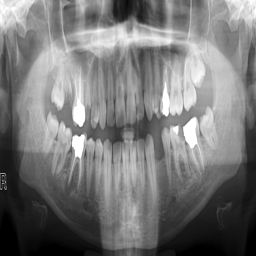